<div style="border:solid green 2px; padding: 20px"> 
    
# Исследование рынка российского кинопроката

Заказчик этого исследования — Министерство культуры Российской Федерации.

Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.

Вы будете работать с данными, опубликованными на [портале открытых данных Министерства культуры](http://opendata.mkrf.ru/). Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

---
    
**Описание данных**

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` _—_ объём возвратных средств государственной поддержки;
- `nonrefundable_support` _—_ объём невозвратных средств государственной поддержки;
- `financing_source` _—_ источник государственного финансирования;
- `budget` _—_ общий бюджет фильма;
- `ratings` _—_ рейтинг фильма на КиноПоиске;
- `genres` _—_ жанр фильма.

Обратите внимание, что столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.
---
    
**Цель исследования**

1. Изучить рынок российского кинопроката и выявить текущие тренды
2. Исследовать фильмы, которые получили государственную поддержку
3. Выявить, насколько фильмы с господдержкой интересны зрителю
---
    
***Ход исследования***
    
Данные о прокатных удостоверениях получим из файла `/datasets/mkrf_movies.csv`, а также есть данные о прокате в российских кинотеатрах, их получим из файла `/datasets/mkrf_shows.csv`. О качестве датасетов информации нет. Перед тем как приступать к цели исследования, необходимо объединить эти два файла и изучить данные.
    
Проверим данные на предмет ошибок и оценим их влияние на результаты исследования. В процессе преодобработки данных попробуем исправить все ошибки, которые могут привести к искажению конечного результата. Далее мы создадим необходимые столбцы и приступим к исследовательскому анализу данных.
    
Таким образом, мое исследование пройдет в пять этапов:
- изучение предоставленных данных и объединение их в один датафрейм
- предобработка данных
- расчеты и добавление результатов в таблицу
- изучение закономерностей в данных
- написание общего вывода

## Откройте файлы с данными и объедините их в один датафрейм

In [1]:
# импортируем необходимые нам библиотеки для анализа данных
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

In [2]:
# преобразуем экспоненциальную запись в более читаемую для удобства
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
# прочитаем оба файла
try:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    mkrf_movies = pd.read_csv('C:/Users/etols/Downloads/mkrf_movies.csv')
    
try:
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    mkrf_shows = pd.read_csv('C:/Users/etols/Downloads/mkrf_shows.csv')

In [4]:
# выведем первые 5 строк по каждому датасету
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
mkrf_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


***Мы выявили столбец, по которому будем объединять таблицы, это столбец `puNumber`. Для этого в столбце должен быть одинаковый тип данных. Проверим, выведем информацию о таблицах.***

In [6]:
# изучим общую информацию по датасетам
mkrf_movies.info()
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

***Типы данных не совпадают, необходимо преобразовать столбец в тип данных int64, чтобы объединить.***

In [7]:
# переименуем столбцы из camelCase
mkrf_movies = mkrf_movies.rename(columns = {'puNumber': 'pu_number'})
mkrf_shows = mkrf_shows.rename(columns = {'puNumber': 'pu_number'})

In [8]:
# проверим
mkrf_movies.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object')

In [9]:
mkrf_shows.columns

Index(['pu_number', 'box_office'], dtype='object')

In [10]:
# mkrf_movies['pu_number'].astype(int) - при преобразовании выдает ошибку, есть строка, в которой значение отсутствует - "нет"
mkrf_movies[mkrf_movies['pu_number'] == 'нет']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


***Наши данные взяты с портала открытых данных Министерства культуры, вероятно номер прокатного удостоверения потерялся при выгрузке, найдем потерянный номер по названию: ["Курбан-роман. (История с жертвой)"](https://opendata.mkrf.ru/opendata/7705851331-register_movies). Заполним пропуск. Сразу обратим внимание, что строки на сайте Министерства две одинаковых, одну позже удалим.***

In [11]:
mkrf_movies.loc[mkrf_movies['pu_number'] == 'нет', 'pu_number'] = '111009614'

In [12]:
# проверим, действительно ли у нас две одинаковых строки
mkrf_movies[mkrf_movies['pu_number'] == '111009614']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),111009614,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


***На портале Министерства дата начала показа этого фильма - 2014-09-02, поэтому ее оставим, а дублирующую удалим.***

In [13]:
# удалим дублирующую строку сразу со сбросом индекса
mkrf_movies = mkrf_movies.drop(index=1797).reset_index(drop=True)

In [14]:
# проверим, дейтсвительно ли осталась одна необходимая нам строка
mkrf_movies[mkrf_movies['pu_number'] == '111009614']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
2077,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# теперь преобразуем тип данных
mkrf_movies['pu_number'] = mkrf_movies['pu_number'].astype('int64')

In [16]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [17]:
# объединим данные из двух таблиц и сохраним в новый датафрейм
data = mkrf_movies.merge(mkrf_shows, on='pu_number', how='outer')

In [18]:
# выведем информацию о получившемся датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

***Вывод:***

Мы открыли оба файла с данными, выявили в них общий столбец, по которому можно "сВПРить" таблички. Данный столбец `pu_number` мы переименовали для эстетического удовлетворения в snake_case и привели к одному и тому же типу данных. Выведя общую информацию о полученном датафрейме, мы увидели, что все 3158 значений второй таблицы вошли в получившийся датафрейм без потерь.

*Что можно сказать по данным:*
- в столбце `show_start_date` явно потребуется преобразование данных в тип datetime, так как это дата премьеры фильма
- в столбцах имеются пропуски
- для столбцов `film_studio`, `director` и `production_country` пропуски можно заполнить вручную из открытых источников, их не так много
- в столбце `producer` уже 568 пропущенных значений, для поставленной задачи данный столбец не особо важен, поэтому оставим как есть
- в столбцах `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` указаны значения только для тех фильмов, которые получили господдержку, соответственно пропуски значат, что государственной поддержки для этих фильмов не было, пропуски оставляем как есть
- в столбце `ratings` потребуется преобразование типа данных, так как это числовое значение, преобразуем во float64
- в столбце `genres` есть пропуски, далее посмотрим, оставим их как есть, либо заменим на какое-либо значение, например, "нет данных".

## Предобработка данных

### Преобразование типов данных

In [19]:
# еще раз посмотрим на типы данных в датафрейме
data.dtypes

title                     object
pu_number                  int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

***Тип данных в столбце `pu_number` мы преобразовали ранее, это было необходимо для объединения данных из двух таблиц.***

***Далее, мы видим, что столбец `show_start_date` имеет тип данных object, здесь необходимо преобразовать в корректный тип datetime, так как столбец содержит информацию о дате премьеры фильма.***

In [20]:
# преобразуем тип данных в корректный формат даты и времени и сразу проверим, что получилось
data['show_start_date'] = pd.to_datetime(data['show_start_date']) 
data['show_start_date'].dtypes

datetime64[ns, UTC]

***А также столбец `ratings` содержит числовые данные о рейтингах фильма, его необходимо преобразовать из object во float64.***

In [21]:
# data['ratings'] = data['ratings'].astype('float') - выдал ошибку, оказывается, в столбце есть процентные значения

In [22]:
# выведем уникальные значения, посмотрим, что еще там может быть
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [23]:
# уберем значок процента  
data = data.apply(lambda x: x.replace('%','', regex=True))
# преобразуем тип данных
data['ratings'] = data['ratings'].astype('float')
data['ratings'].dtypes

dtype('float64')

***После того, как мы убрали проценты и преобразовали тип данных, у нас остались большие значения, например, 89, 62 и т.д. Судя по сайту Кинопоиск, мы помним, что максимальный рейтинг может быть равным 10, поэтому предположим, что тут должны быть дробные значения, 8,9 или 6,2. Приведем значения к соответствующему виду, основываясь на нашей гипотезе.***

In [24]:
# поделим значения, которые прервышают максимальный рейтинг, на 10
data.loc[data['ratings'] > 10,'ratings'] = data['ratings'] / 10

In [25]:
# проверим, что получилось
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

### Работа с пропусками

In [26]:
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7485

In [27]:
# вспомним, в каких столбцах у нас имеются пропуски
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

**Посмотрим на пропуски в столбце `film_studio`, их не так много, попробуем посмотреть, есть ли данные в открытом доступе, например, на сайте Кинопоиск.**

In [28]:
# отфильтруем только строки с пропусками в данном столбце
data[data['film_studio'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6484,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6496,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Сразу обратим внимание на две строки с явными дубликатами, нужно будет обязательно проверить дальше, есть ли еще.**

In [29]:
# произведем замены у фильмов, у которых мы нашли студии
data.loc[1293,'film_studio'] = 'Бискит Пикчерз, Контемптибл Интертейнмент, Мишн Фильмворкс'
data.loc[4440, 'film_studio'] = 'Пространство идей'
data.loc[6104, 'film_studio'] = 'Правда Филмз'
data.loc[6180, 'film_studio'] = 'Продюсерский центр «Молодёжные инициативы»'
data.loc[6493, 'film_studio'] = 'Аннико Филмз'
data.loc[6637, 'film_studio'] = 'Третьяковская Галерея, Благотворительный фонд Владимира Потанина'
# для остальных установим значение "нет данных"
data.loc[[6378, 6398, 6484, 6496, 6497, 6498, 6506, 6510, 6638, 6661, 6721], 'film_studio'] = 'нет данных'

In [30]:
# сразу удалим дублирующую строку, которая нам попалась
data = data.drop(index=6379).reset_index(drop=True)

***Большинство фильмов, у которых не указаны студии, являются авторским или документальным кино. Для ячеек, по которым не удалось найти информацию, мы установили значение "нет данных".***

In [31]:
# проверим, остались ли пропуски
data['film_studio'].isna().sum()

0

**Далее мы видим 2 пропуска в столбце `production_country`, посмотрим, что это за строки.**

In [32]:
# выведем на экран строки с пропусками
data[data['production_country'].isna()==True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Пространство идей,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


In [33]:
# произведем замены
data.loc[3185, 'production_country'] = 'СССР - Россия'
data.loc[4440, 'production_country'] = 'Россия'

***Оба фильма оказались российскими, поэтому мы с легкостью произвели замену.***

In [34]:
# проверим пропуски
data['production_country'].isna().sum()

0

**Еще один столбец с небольшим количеством пропусков, которые мы можем попробовать заменить, это `director`. Посмотрим, возможно ли найти данные в открытых источниках.**

In [35]:
data[data['director'].isna()==True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Пространство идей,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


**Для данных пропусков удалось найти режиссера только для строки Мульт личности. Выпуск 5. Его заполнили, в остальных проставили значение "нет данных".**

In [36]:
data.loc[4440, 'director'] = 'Василий Пичул, Юрий Владовский'
data.loc[[764, 
          1735, 
          3839, 
          4051, 
          4297, 
          4414, 
          4922, 
          4941], 'director'] = 'нет данных'

***В столбцах `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` одинаковое количество пропусков, для данных фильмов соответственно господдержки не было, поэтому для них не проставлен бюджет и источник государственного финансирования, их оставим как есть.***

***Также есть пропуски в столбцах `ratings` и `genres` - в первом случае оставим как есть (в Кинопоиске для таких картин указано, что недостаточно оценок, рейтинг формируется), во втором случае очень много пропусков для ручного заполнения, также оставим как есть.***

In [37]:
# проверим, что у нас осталось после удаления пропусков
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  568
age_restriction             0
refundable_support       7152
nonrefundable_support    7152
budget                   7152
financing_source         7152
ratings                   965
genres                    974
box_office               4326
dtype: int64

In [38]:
# одну дублирующую строку мы удаляли, поэтому число должно уменьшиться на 1.
len(data)

7484

### Удаление дубликатов

In [39]:
# сразу посчитаем количество явных дубликатов
data.duplicated().sum()

0

***Посмотрим, как обстоит дело с неявными дубликатами.***

***Проверим столбец с номером прокатного удостоверения в первую очередь, потому что по логике номер прокатного удостоверения не должен повторяться, все остальное так или иначе может повторяться. Проверим информацию позднее.***

In [40]:
# выведем все строки-дубликаты по столбцу с номером
data[data['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


***В первом повторе мы видим, что номер прокатного удостоверения повторяется у разных фильмов, смахивает на ошибку.*** 

***Проверим первый номер прокатного удостоверения [в открытом доступе](https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/?FIELD%5BNAME%5D=&FIELD%5BDIRECTOR%5D=&FIELD%5BFROM_YEAR%5D=&FIELD%5BTO_YEAR%5D=&FIELD%5BLANG_NAME%5D=&FIELD%5BSTUDIO%5D=&FIELD%5BAGE%5D=+&FIELD%5BFROM_MIN%5D=&FIELD%5BTO_MIN%5D=&FIELD%5BCOUNTRY%5D=&FIELD%5BSCRIPT_AUTHOR%5D=&FIELD%5BCOMPOSER%5D=&FIELD%5BART_DIRECTOR%5D=&FIELD%5BPRODUCER%5D=&FIELD%5BCARD_NUMBER%5D=&FIELD%5BRIGHTS%5D=+&FIELD%5BFROM_CARD_DATE%5D=&FIELD%5BTO_CARD_DATE%5D=&FIELD%5BTEXT%5D=). Действительно, выдал оба фильма, соответственно так и оставляем.***

***Второй дубликат в принципе повторяет эту же ситуацию, поскольку это разные фильмы, первая и вторая часть, однако прокатное удостоверение одно. Тут ничего не удаляем, поскольку на официальном сайте так и есть.***

***Посмотрим, что будет если проверить одинаковые наименования фильмов.***

In [41]:
# посмотрим, сколько есть дубликатов среди названий фильмов
data[data['title'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал",NaN
7414,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN
7436,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма","175,003.51"
7448,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив",NaN


***1270 строк с одинаковыми названиями фильмов! Посмотрим, на всякий случай, что в других ячейках, у которых одинаковое название фильмов, на примере нескольких.***

In [42]:
# возьмем выборку 10 случайных фильмов с повторами названий
data[data['title'].duplicated()].sample(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2003,Тропы,121014814,2014-07-21 12:00:00+00:00,Художественный,Си-Сав Филмз,Австралия,Джон Кёрран,"Антония Барнард, Эйн Каннинг, Эмиль Шерман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"драма,биография",NaN
4523,"Жизнь, как она есть",221145010,2010-12-10 12:00:00+00:00,Художественный,"Джосефсон Интертейнмент, Голд Сёркл Филмз, Вил...",США,Грэг Берланти,"Пол Брукс, Барри Джосефсон",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.50,"драма,мелодрама,комедия",NaN
4606,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221160510,2010-12-17 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"драма,спорт",NaN
4846,Зеленый шершень,221002611,2011-02-11 12:00:00+00:00,Художественный,"Коламбиа Пикчерз, Ориджинал Филм",США,Мишель Гондри,Нил Мориц,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.00,"боевик,комедия,криминал",NaN
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"фэнтези,приключения,семейный","843,310.00"
988,Переполох на районе,121005313,2013-02-27 12:00:00+00:00,Художественный,"Гомон, Сав Феррис Интертейнмент, Мандарин Филь...",Франция,Франк Гастамбиде,"Николас Альтмайер, Эрик Альтмайер, Кристоф Том...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,4.60,комедия,NaN
4757,Призраки бывших подружек,221175910,2010-12-31 12:00:00+00:00,Художественный,"Нью Лайн Синема, Пантер, Уорнер Бразерс",США,Марк С. Уотерс,"Джон Шестак, Брэд Эпштейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,"фэнтези,мелодрама,комедия",NaN
4582,Безумцы,221157210,2010-12-17 12:00:00+00:00,Художественный,"Овертуре Филмз, Партиписиант Медиа, Пенн Стейш...",США - ОАЭ,Брек Айзнер,Майкл Агиляр,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.90,драма,NaN
5339,Дом грёз,221114711,2011-11-11 12:00:00+00:00,Художественный,"Клиффджек Моушн Пикчерз, Морган Крик Продакшнз",США,Джим Шеридан,"Дэниэл Бобкер, Эхерн Крюгер, Джеймс Г.Робинсон...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,криминал",NaN
1314,"Двойник /По повести Ф.М.Достоевского ""Двойник....",121005714,2014-03-28 12:00:00+00:00,Художественный,"Алков Интертейнмент, Аттеркоп Продакшнз, Брити...",Великобритания,Ричард Айоади,"Амина Дасмал, Майкл Кейн, Робин Фокс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.40,"фантастика,триллер,драма",NaN


In [43]:
# чекнем первую картину из списка 
data.query('title == "Особо опасен"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


In [44]:
data.query('title == "Эпидемия_"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1299,Эпидемия_,221000616,2016-01-29 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.20,"драма,фантастика,триллер",NaN
1300,Эпидемия_,121025713,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.20,"драма,фантастика,триллер",NaN
1301,Эпидемия_,221035513,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.20,"драма,фантастика,триллер",NaN


In [45]:
data.query('title == "Храбрые перцем"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4919,Храбрые перцем,121006611,2011-04-22 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Стабер Продакшнз",США,Дэвид Гордон Грин,"Эндрю З.Дэвис, Скотт Стабер, Марк Хаффам",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.90,"фэнтези,комедия,приключения",NaN
5035,Храбрые перцем,221118111,2011-11-16 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Стабер Продакшнз",США,Дэвид Гордон Грин,"Эндрю З.Дэвис, Скотт Стабер, Марк Хаффам",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.90,"фэнтези,комедия,приключения",NaN
5210,Храбрые перцем,221102211,2011-10-05 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Стабер Продакшнз",США,Дэвид Гордон Грин,"Эндрю З.Дэвис, Скотт Стабер, Марк Хаффам",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.90,"фэнтези,комедия,приключения",NaN


***Мы видим, что у одного и того же фильма разные прокатные удостоверения, однако это имеет место быть, если, например, картина выходила в прокат не один раз или менялся правообладатель. Остальная информация в наших примерах совпадает, но даже если где-то и будет различаться, это не должно повлиять на наше исследование.***

### Изучение столбцов с категориальными значениями

***Посмотрим на уникальные значения столбцов с категориальными значениями, проверим, нет ли ошибок в названиях или еще каких-либо неточностей.***

In [46]:
# проверим уникальные значения типов фильмов
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

***Мы видим, что в уникальных значениях фильмов также есть неявные дубликаты, лишние пробелы, которые мы можем убрать и привести одинаковые жанры к единому написанию.***

In [47]:
# избавимся от разных написаний одного и того же типа
data = data.apply(lambda x: x.replace({' Художественный':'Художественный', ' Анимационный': 'Анимационный'}, regex=True))

In [48]:
# выведем еще раз уникальные значения столбца `type`
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [49]:
# посмотрим, какие есть значения в столбце со страной-производителем
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [50]:
# посмотрим, какие есть значения в столбце с возрастными ограничениями
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [51]:
# на всякий случай проверим жанры
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

***Каких-либо еще неточностей мы не выявили, разве что в столбце `production_country` в ячейках, где несколько стран, где-то данные записаны через дефис и пробел, где-то без пробела, однако не думаю, что это нужно исправлять.***

***Общая проблема почти для всех категориальных столбцов, которая может помешать нам в дальнейшем исследовании - это то, что в ячейках записано сразу по несколько значений. Пока не будем их разделять на отдельные столбцы, к тому же в дальйнейшем задании у нас есть пункт, в котором мы будем добавлять столбцы с первыми значениями из этих ячеек.***

### Изучение столбцов с количественными значениями

***Нам нужно обратить внимание на столбцы с количественными значениями и посмотреть, обнаружились ли в этих столбцах подозрительные данные.***

In [52]:
# посмотрим описательную статистику количественных значений
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,484.00",332.00,332.00,332.00,"6,519.00","3,158.00"
mean,"135,199,685.46","11,864,457.83","48,980,988.89","127,229,716.68",6.49,"76,478,696.16"
std,"38,354,545.37","24,916,555.26","59,980,117.92","188,588,333.12",1.11,"240,353,122.82"
min,"1,811,096.00",0.00,0.00,0.00,1.00,0.00
25%,"112,025,193.00",0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00"
50%,"121,015,510.50",0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55"
75%,"124,003,314.25","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


In [54]:
# выведем описательную статистику количественных значений
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,484.00",332.00,332.00,332.00,"6,519.00","3,158.00"
mean,"135,199,685.46","11,864,457.83","48,980,988.89","127,229,716.68",6.49,"76,478,696.16"
std,"38,354,545.37","24,916,555.26","59,980,117.92","188,588,333.12",1.11,"240,353,122.82"
min,"1,811,096.00",0.00,0.00,0.00,1.00,0.00
25%,"112,025,193.00",0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00"
50%,"121,015,510.50",0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55"
75%,"124,003,314.25","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


***На всякий случай проверим действительно ли минимальное значение в столбце `ratings` имеет значение 1,00. Очень редко такие рейтинги можно увидеть. Посмотрим, что это за картина и проверим по сайту Кинопоиск, нет ли тут ошибки.***

In [55]:
# выведем данную строку на экран
data.query('ratings == 1.00')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3514,Взломать блогеров,111016616,2016-10-28 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,М.Свешников,Т.Бекмамбетов,«6+» - для детей старше 6 лет,0.00,"25,000,000.00","36,016,269.00",Фонд кино,1.00,"комедия,мультфильм,фантастика","7,323,648.00"


***Да, действительно, у фильма именно такой рейтинг и есть. Что самое интересное, картина одна из тех, которая получила государственную поддержку на безвозвратной основе. Понятно, на что идут наши налоги, но это мы отступили от темы :)***

***Также хочется обратить внимание, что в столбце `box_office` очень сильный разбег в данных, и вроде это логично, фильмы есть разные. Все же хочется на всякий случай свериться, посмотрим сначала на самое максимальное значение по сборам.***

In [56]:
data.query('box_office == 3073568690.79')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7454,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00","35,000,000.00","160,000,000.00",Фонд кино,6.80,комедия,"3,073,568,690.79"


***Тут ошибки нет, судя по сведениям с сайта Кинопоиск, там указаны сборы в долларах - $62 229 664. Все так и есть.***

***Еще очень подозрительным кажется нулевое значение. Может означать, что информации по сборам, например, не имеется.***

In [57]:
data.query('box_office == 0.00')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,"драма,биография,музыка",0.00
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,драма,0.00
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,комедия,0.00
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.50,"драма,военный,история",0.00
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.40,"аниме,мультфильм,драма",0.00
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.70,"аниме,мультфильм,фантастика",0.00
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,биография,0.00
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"комедия,мелодрама",0.00
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.80,"мелодрама,комедия,драма",0.00
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...",Германия - Бельгия - США -Франция,Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.90,драма,0.00


***Еще посмотрим, есть ли очень малые значения по сборам, возьмем, например, сборы ниже 10 000.***

In [58]:
data.query('box_office < 10000')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.00,"мелодрама,комедия",360.00
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,420.00
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.70,"комедия,мелодрама,криминал",380.00
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.10,драма,"1,165.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5379,ШПИОН,111009411,2011-12-09 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова",Россия,А.Андрианов,"С.Шумаков, Л.Верещагин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.10,"боевик,комедия,криминал","5,405.00"
5387,ВОИН.com,111004411,2011-07-04 12:00:00+00:00,Художественный,"ООО ""Культурные инициативы""",Россия,Е.Бычкова,"В.Малышев, А.Малышев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,4.70,комедия,465.00
5388,Кунг-фу Панда 2.,224021411,2011-11-15 12:00:00+00:00,Анимационный,ДримУоркс Анимэйшн,США,Дженнифер Ю,"Мелисса Кобб, Джонатан Айбел, Гленн Бергер",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.40,"мультфильм,фэнтези,боевик","9,270.00"
6579,Время собирать цветы,112025118,2019-01-01 12:00:00+00:00,Документальный,"ООО ""Краеведофф""",Россия,Г.Щерба,О.Ракшин,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"7,175.00"


***Есть подозрения, что значения, равные 0, на самом деле, это пропуски, либо невыгрузившиеся по каким-то причинам данные. Что по поводу совсем небольших сборов, среди них мультфильм "Кунг-фу Панда 2", по таблице у него сборы всего 9270.00, что точно не так.***

***Заполнять эти нулевые и малые значения какими-то средними будет совсем неверно, поскольку фильмы совсем разные, поэтому пока просто оставим как есть.***

***Еще сразу внимание привлекает нулевое значение в столбце `budget`, посмотрим, что это за строки, что это за картины.***

In [59]:
# отфильтруем строки с нулевым бюджетом
data.query('budget == 0.00')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


***Что самое интересное, у ВСЕХ этих картин с нулевым значением бюджета есть господдержка, соответственно можно заполнить эти значения, сложив объем возвратных средств и невозвратных средств господдержки.***

In [60]:
# напишем функцию, которая заполнит пропуски в тех ячейках, где бюджет нулевой
def fill_budget(row):
    if row['budget'] == 0.00:
        return row['refundable_support'] + row['nonrefundable_support']
    else:
        return row['budget']
data['budget'] = data.apply(fill_budget, axis=1)

In [61]:
# проверим, все ли значения заполнились
data.query('budget == 0.00')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


### Добавление в таблицу новых столбцов

- столбец с информацией о годе проката (выделим год из даты премьеры фильма);
- столбцы с именем и фамилией главного режиссёра и основным жанром фильма (в столбцы войдут первые значения из списка режиссёров и жанров соответственно);
- столбец с подсчетом доли государственной поддержки от общего бюджета фильма.

In [62]:
# добавим столбец с годом проката фильма, выделив его из столбца с датой
data['year_release'] = data['show_start_date'].dt.year

In [63]:
# добавим столбцы с фамилией главного режиссера и основным жанром фильма
data['main_director'] = data['director'].str.split(',').str[0]
data['main_genre'] = data['genres'].str.split(',').str[0]

***В задании этого нет, однако возможно это пригодится нам в дальнейшем исследовании, поэтому добавим также столбец с основной страной-производителем, по аналогии возьмем первые значения из столбца `production_country`. В данном случае уже будет не один разделитель, поскольку в одних ячейках значения разделены запятыми, в других - дефисами.***

In [64]:
# попробуем убрать лишние разделители
data['country'] = data['production_country'].str.split('-').str[0]
data['country'] = data['country'].str.split(',').str[0]

In [65]:
# посмотрим уникальные значения нашего нового столбца
data['country'].unique()

array(['США', 'СССР', 'Франция', 'Германия', 'Великобритания ',
       'Чехословакия', 'США ', 'Новая Зеландия', 'Канада ',
       'Великобритания', 'Франция ', 'Россия', 'Гонконг', 'Гонконг ',
       'Ирландия', 'Чехия', 'Люксембург ', 'Новая Зеландия ', 'Япония',
       'Канада', 'Германия ', 'Аргентина ', 'Дания ', 'Австрия', 'СССР ',
       'Россия ', 'Италия', 'КНР ', 'КНР', 'Швеция', 'Испания', 'Дания',
       'Мексика ', 'Аргентина', 'Бразилия', 'Чили', 'Австралия',
       'Португалия ', 'Исландия', 'Южная Корея', 'Бельгия', 'Чехия ',
       'Украина', 'Италия ', 'Босния и Герцеговина ', 'Испания ',
       'Норвегия ', 'Норвегия', 'Швейцария', 'Греция ', 'Норвения',
       'Южная Корея ', 'Чили ', 'Австрия ', 'Швеция ', 'Грузия ',
       'Финляндия ', 'Израиль', 'Бразилия ', 'Иран', 'Нидерланды',
       'Республика Узбекистан', 'Турция', 'Сербия ', 'Киргизия', 'Индия',
       'Нидерланды ', 'Япония ', 'Израиль ', 'Польша ', 'Австралия ',
       'Армения', 'Бельгия ', 'ЮАР', 'Рес

In [66]:
data.query('country == "2019"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release,main_director,main_genre,country
7245,Дело Коллини,121027219,2019-09-19 12:00:00+00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"детектив,драма,криминал",NaN,2019,Марко Кройцпайнтнер,детектив,2019


***Как мы увидели из списка, есть ошибки в написании некоторых стран (например, СЩА, Сша, Норвения), лишние пробелы перед и после названий стран. Также откуда-то в столбце со страной попался год 2019, посмотрим из открытых источников, это фильм Дело Коллини, страна Германия. Постараемся поправить все эти некорректности в данном столбце.***

In [67]:
# произведем необходимые замены
data['country'] = data['country'].replace({'Сша': 'США',
                                       'СЩА': 'США',
                                       ' ':'',
                                       'Республика':'',
                                       'Норвения': 'Норвегия'
                                        }, regex=True)
data.loc[7245, 'country'] = 'Германия'

In [68]:
# проверим замены, выведем еще раз уникальные значения столбца
data['country'].unique()

array(['США', 'СССР', 'Франция', 'Германия', 'Великобритания',
       'Чехословакия', 'НоваяЗеландия', 'Канада', 'Россия', 'Гонконг',
       'Ирландия', 'Чехия', 'Люксембург', 'Япония', 'Аргентина', 'Дания',
       'Австрия', 'Италия', 'КНР', 'Швеция', 'Испания', 'Мексика',
       'Бразилия', 'Чили', 'Австралия', 'Португалия', 'Исландия',
       'ЮжнаяКорея', 'Бельгия', 'Украина', 'БоснияиГерцеговина',
       'Норвегия', 'Швейцария', 'Греция', 'Грузия', 'Финляндия',
       'Израиль', 'Иран', 'Нидерланды', 'Узбекистан', 'Турция', 'Сербия',
       'Киргизия', 'Индия', 'Польша', 'Армения', 'ЮАР', 'Беларусь',
       'Румыния', 'Болгария', 'Индонезия', 'Таиланд', 'Малайзия',
       'Азербайджан', 'Парагвай', 'Уругвай', 'Хорватия', 'Венгрия',
       'Эстония', 'Венесуэла', 'Македония', 'Кипр', 'Перу', 'Китай',
       'КняжествоАндорра', 'Казахстан', 'ОАЭ', 'Корея', 'Голландия',
       'Литва', 'Латвия', 'Монголия', 'Сингапур', 'CША', 'Ливан', 'Кения',
       'Колумбия', 'Пуэрто', 'Пакистан']

In [69]:
data['country'].nunique()

79

In [70]:
# добавим столбец с долей господдержки от общего бюджета фильма
data['finsupport_share'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [71]:
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,year_release,finsupport_share
count,"7,484.00",332.00,332.00,332.00,"6,519.00","3,158.00","7,484.00",332.00
mean,"135,199,685.46","11,864,457.83","48,980,988.89","131,422,395.80",6.49,"76,478,696.16","2,014.59",0.54
std,"38,354,545.37","24,916,555.26","59,980,117.92","187,148,242.67",1.11,"240,353,122.82",3.01,0.20
min,"1,811,096.00",0.00,0.00,"6,000,000.00",1.00,0.00,"2,010.00",0.04
25%,"112,025,193.00",0.00,"25,000,000.00","45,524,799.50",5.90,"86,239.00","2,012.00",0.38
50%,"121,015,510.50",0.00,"30,000,000.00","71,196,901.50",6.60,"2,327,987.55","2,015.00",0.61
75%,"124,003,314.25","15,000,000.00","40,375,000.00","150,000,000.00",7.20,"23,979,671.02","2,017.00",0.66
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79","2,019.00",1.00


In [72]:
# проверим добавление новых столбцов
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office', 'year_release',
       'main_director', 'main_genre', 'country', 'finsupport_share'],
      dtype='object')

In [73]:
# проверим, для скольки строк посчиталась доля господдержки
data[data.finsupport_share > 0].shape

(332, 21)

***Количество значений в столбце с долей господдержки `finsupport_share` совпадает с количествами непустых значений в столбцах `refundable_support`, `nonrefundable_support` и `budget`, их 332, значит столбец заполнен верно.***

***Вывод:***

В ходе изучения предоставленной нам выборки данных мы выявили, что данные требуют некоторой предобработки - в данных присутствуют и пропуски, и неявные дубликаты, также были столбцы, в которых нам нужно было преобразовать тип данных, а также мы добавили в таблицу дополнительные столбцы для анализа.

- преобразование данных мы произвели в следующих столбцах - в столбце `pu_number` (изменили тип данных ранее, нам это было необходимо для объединения таблиц), в столбце `show_start_date` (привели его в корректный формат даты, так как нам в дальнейшем будет проще с ним работать), и наконец, в столбце `ratings`.
- в нескольких столбцах нам удалось заполнить пропуски, на основании информации с сайта Кинопоиск - это такие столбцы как `film_studio`, `production_country`, `director` (здесь к слову удалось найти только одно значение, остальные мы заполнили значением "нет данных").
- в  столбцах с пропусками, которые содержат информацию по господдержке, пропуски мы оставили как есть, поскольку они логичны, просто для данных картин господдержки не было.
- в столбцах с категориальным типом данных мы устранили некорректность в написании некоторых типов фильмов, убрали пробел из названия, также выявили общую проблему для таких столбцов - в одной ячейке  написано сразу по несколько значений, что может помешать нам в дальнейшем анализе.
- для столбцов с количественными значениями мы исправили некорректные данные о бюджете картины, взяв данные из столбцов с предоставленной господдержкой, так как бюджет картины не может быть по логике меньше, чем объем предоставленных государством средств, как минимум бюджет может быть им равен.
- мы добавили в таблицу новые столбцы, выведя год из столбца с датой, главного режиссера, основную страну-производитель, жанр фильма, а также столбец с долей государственной поддержки.

## Исследовательский анализ данных

### Подсчет фильмов, выходивших в прокат каждый год

***Данные о показах в кинотеатрах содержатся в колонке `box_office`, данные представлены далеко не для всех фильмов. Посчитаем те картины, для которых эти данные указаны. Также сразу посчитаем общее количество фильмов, выпущенных в определенные года.***

In [74]:
# посчитаем, сколько фильмов показывалось в кинотеатрах в определенные годы
films_count = data.groupby('year_release',as_index=False) \
    .agg({'box_office':'count', 'title':'count'}) \
    .rename(columns={'box_office':'films_release', 'title':'films_total'})
films_count.sort_values(by='films_release', ascending=False)

,year_release,films_release,films_total
9,2019,530,930
6,2016,526,818
8,2018,475,890
5,2015,465,705
7,2017,357,505
4,2014,279,806
3,2013,184,630
2,2012,128,593
1,2011,109,622
0,2010,105,985


In [75]:
# посчитаем среднее количество фильмов в прокате в год
round(films_count['films_release'].mean())

316

In [76]:
# немного улучшим цветовую схему для наших диаграмм
plt.style.use('bmh')

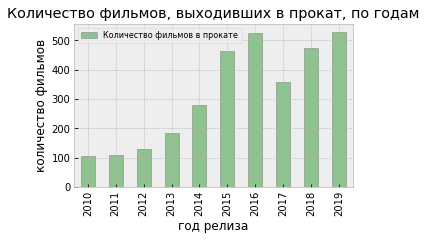

In [77]:
# нарисуем диаграмму для наглядности отображения количества фильмов в прокате по годам
films_count.plot(kind='bar',
                   edgecolor = 'black',
                   figsize=(5,3),
                   x='year_release',
                   y='films_release',
                   title='Количество фильмов, выходивших в прокат, по годам',
                   xlabel='год релиза',
                   ylabel='количество фильмов',
                   color='g',
                   alpha=0.4,
                   grid=True)
plt.legend(['Количество фильмов в прокате'], fontsize=8)
plt.show()

***По данным графика и сводной таблицы мы увидели, что больше всего картин вышло в прокат в 2019 г.(530 фильмов) и 2016 г. (526 фильмов), вообще есть тенденция к увеличению количества фильмов, которые выпускаются в прокат, примерно начиная с 2015 года.***

***В среднем в прокат выходит около 316 фильмов в год.***

In [78]:
# посчитаем общее количество фильмов, выпущенных в определенные годы
films_count = data.groupby('year_release', as_index=False) \
    .agg({'box_office':'count', 'title':'count'}) \
    .rename(columns={'box_office':'films_release', 'title':'films_total'})
films_count.sort_values(by='films_total', ascending=False)

,year_release,films_release,films_total
0,2010,105,985
9,2019,530,930
8,2018,475,890
6,2016,526,818
4,2014,279,806
5,2015,465,705
3,2013,184,630
1,2011,109,622
2,2012,128,593
7,2017,357,505


In [79]:
# посчитаем среднее количество фильмов, выпускаемых в год
round(films_count['films_total'].mean())

748

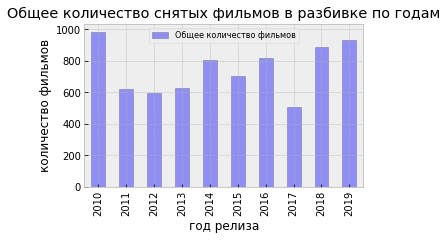

In [80]:
# нарисуем диаграмму для наглядности отображения количества фильмов в прокате по годам
films_count.plot(kind='bar',
                   edgecolor = 'black',
                   figsize=(5,3),
                   x='year_release',
                   y='films_total',
                   title='Общее количество снятых фильмов в разбивке по годам',
                   xlabel='год релиза',
                   ylabel='количество фильмов',
                   color='b',
                   alpha=0.4,
                   grid=True)
plt.legend(['Общее количество фильмов'], fontsize=8)
plt.show()

***Как мы видим, самый плодотворный год для выпуска фильмов был 2010 год, а также достаточно много фильмов выпустили в период 2018-2019 гг.***

***В среднем, в год выпускается около 748 фильмов.***

In [81]:
# добавим в нашу сводную таблицу долю фильмов, для которых указана информация о прокате
films_count['films_share'] = films_count['films_release'] / films_count['films_total']
films_count.sort_values(by='films_share', ascending = False)

,year_release,films_release,films_total,films_share
7,2017,357,505,0.71
5,2015,465,705,0.66
6,2016,526,818,0.64
9,2019,530,930,0.57
8,2018,475,890,0.53
4,2014,279,806,0.35
3,2013,184,630,0.29
2,2012,128,593,0.22
1,2011,109,622,0.18
0,2010,105,985,0.11


In [82]:
# посчитаем общую долю фильмов, для которых указана информация о прокате
films_count['films_share'].mean() * 100

42.49046366851098

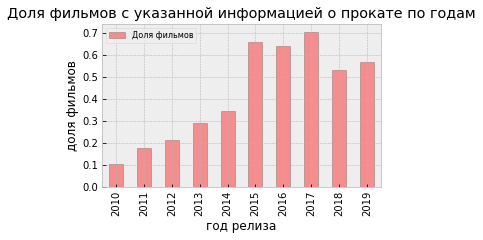

In [83]:
# нарисуем диаграмму для наглядности отображения доли фильмов с указанной информацией о прокате по годам
films_count.plot(kind='bar',
                   edgecolor = 'black',
                   figsize=(5,3),
                   x='year_release',
                   y='films_share',
                   title='Доля фильмов с указанной информацией о прокате по годам',
                   xlabel='год релиза',
                   ylabel='доля фильмов',
                   color='r',
                   alpha=0.4,
                   grid=True)
plt.legend(['Доля фильмов'], fontsize=8)
plt.show()

***Фильмы с указанной информацией о прокате в кинотеатрах составляют около половины от общего количества фильмов, представленного в нашей выборке (42,5 %). Эта доля начала расти примерно с 2015 года.***

***Полнее всего в исследуемых данных представлен период 2015-2019 гг.***

### Исследование динамики проката фильмов по годам

Посмотрим, как менялась динамика проката по годам. Определим, в каком году сумма сборов была минимальной, в каком - максимальной. А также посчитаем среднее и мединное значения для суммы сборов по каждому году.

In [84]:
# создадим сводную таблицу, чтобы отследить динамику проката по годам
data.pivot_table(
    index = 'year_release',
    values = 'box_office',
    aggfunc = {'sum'}
).sort_values(by='sum', ascending=False).reset_index()

,year_release,sum
0,2018,"49,668,403,134.32"
1,2017,"48,563,707,217.51"
2,2019,"48,425,708,779.59"
3,2016,"47,866,299,741.91"
4,2015,"39,497,365,196.40"
5,2014,"7,444,951,859.20"
6,2013,"29,799,706.20"
7,2011,"14,102,765.00"
8,2012,"6,955,423.00"
9,2010,"2,428,654.00"


***Как мы увидели из сводной таблицы, сумма сборов очень сильно выросла с 2014 года, и затем снова был резкий подьъем с 2015 года, самая максимальная сумма сборов была в 2018 году (49 668 403 134 руб), а самая минимальная - в первом году из нашей выборки - 2010 году (2 428 654 руб).***

***Можно было бы проследить, за счет сборов каких фильмов так выросла сумма с 2014 года. Поскольку это год, когда обвалился рубль и были введены определенные санкции засчет присоединения Крыма и войны в Донбассе, логично предположить, что сборы выросли за счет роста цен. Однако исследование политической ситуации у нас пока в исследование не входило, пока так углубляться не будем :)***

***Но для интереса можно поглядеть, с каких фильмов больше сумма сборов и вообще какие фильмы представлены у нас в выборке больше.***

In [85]:
# добавим для анализа столбец с типом страны (значения "отечественный", 'советский' и "зарубежный") с помощью функции
def country_type(row):
    if row['country'] == 'Россия':
        return 'отечественный'
    if row['country'] == 'СССР':
        return 'советский'
    else:
        return 'зарубежный'
data['country_type'] = data.apply(country_type, axis=1)

In [86]:
# сгруппируем данные по кассовым сборам и стране
data.groupby('country_type').agg({'box_office':'sum'}).reset_index()

,country_type,box_office
0,зарубежный,"189,033,577,864.88"
1,отечественный,"52,485,277,948.75"
2,советский,"866,663.50"


***Как мы увидели, значительную долу объема кассовых сборов на рынке российского кинопроката составляет зарубежное кино. Странно видеть, что у фильмов, выпущенных в СССР, тем не менее представлена какая-то доля кассовых сборов, скорее всего это был повторный показ данных фильмов в кинотеатрах.***

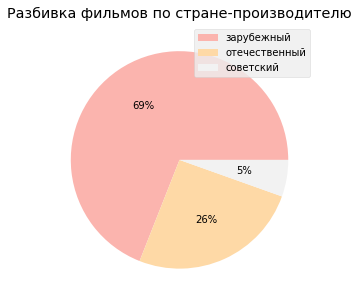

In [87]:
# посмотрим, каких фильмов представлено больше в нашей выборке
data['country_type'].value_counts().plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(5, 5), title='Разбивка фильмов по стране-производителю', cmap='Pastel1')
plt.show()

***Да, в принципе зарубежное кино представлено в российском кинопрокате значительно больше (69%), чем отечественное и советское(26% и 5%). Интересно было бы сравнить данные за текущий, 2024 год, возможно картина была бы иная, но данного задания нет.***

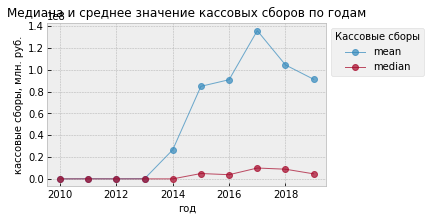

In [88]:
# посмотрим еще на графике сравнение среднего и медианного значения по сборам
data.groupby('year_release')['box_office'].agg(['mean', 'median']) \
    .plot(style='-o', grid=True, figsize=(5, 3), alpha=0.7, linewidth= 1)
plt.legend(bbox_to_anchor=(1,1), loc='upper left', title='Кассовые сборы')
plt.title('Медиана и среднее значение кассовых сборов по годам', fontsize=12)
plt.xlabel('год', fontsize=10)
plt.ylabel('кассовые сборы, млн. руб.', fontsize=10)
plt.show()

In [89]:
# теперь посмотрим на сводной среднее и медианное значения
data.pivot_table(
    index = 'year_release',
    values = 'box_office',
    aggfunc = {'mean', 'median'}
).sort_values(by='median', ascending=False).reset_index()

,year_release,mean,median
0,2017,"136,032,793.33","9,968,340.00"
1,2018,"104,565,059.23","8,891,102.21"
2,2015,"84,940,570.31","4,920,933.00"
3,2019,"91,369,261.85","4,627,798.34"
4,2016,"91,000,569.85","3,846,679.41"
5,2014,"26,684,415.27","18,160.00"
6,2012,"54,339.24","5,660.00"
7,2013,"161,954.92","3,522.50"
8,2011,"129,383.17","3,000.00"
9,2010,"23,130.04","1,700.00"


***Очень наглядно видно, что между медианным и средним значениями очень большая разница, ранее мы уже видели, что есть крайне низкие суммы сборов по некоторым фильмам, что скорее всего является ошибкой, однако мы их поправить в таком количестве вручную не сможем. Высокие сборы скорее всего такие и есть, мы проверили это по максимальной сумме сборов ранее, данные верны.***

***Для анализа лучше брать медианное значение. Самый хороший для российского рынка кинопроката год был 2017, в среднем фильм приносил около `10 млн.руб. в год`, а самый худший - 2010, хотя данные цифры даже для рынка кинопроката кажутся слишком малыми.***

### Исследование влияния возрастных ограничений на кассовые сборы (2015-2019 гг)

Далее для анализа возьмем выборку за период с 2015 по 2019 гг, так как она наиболее емко представлена в данных. 

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в этот период. Также посмотрим фильмы с каким возрастным ограничением собрали больше всего денег в прокате, и зависело ли это от года.

In [90]:
# вспомним, какие категории у нас представлены
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [91]:
# сократим строку с возрастной категорией до значения возраста
data['age_restriction'] = data['age_restriction'].str.split(' -').str[0]

In [92]:
data['age_restriction'].unique()

array(['«18+»', '«6+»', '«12+»', '«16+»', '«0+»'], dtype=object)

In [93]:
# посмотрим зависимость кассовых сборов фильмов от возрастных ограничений
data[data['year_release'] >= 2015] \
    .groupby('age_restriction') \
    .agg({'box_office':'sum'}) \
    .sort_values(by='box_office', ascending=False).reset_index()

,age_restriction,box_office
0,«16+»,"76,034,733,643.63"
1,«12+»,"60,619,446,628.33"
2,«6+»,"55,798,610,799.68"
3,«18+»,"40,759,615,572.12"
4,«0+»,"809,077,425.97"


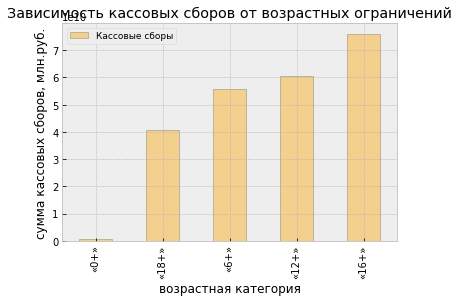

In [94]:
# посмотрим, как это выглядит на графике
data[data.year_release >= 2015].groupby('age_restriction') \
    .agg({'box_office':'sum'}).sort_values(by='box_office') \
    .plot(kind='bar',
          grid=True,
          figsize=(6, 4),
          edgecolor = 'black',
          title='Зависимость кассовых сборов от возрастных ограничений',
          color='orange',
          xlabel='возрастная категория',
          ylabel='сумма кассовых сборов, млн.руб.',
          alpha=0.4)
plt.legend(["Кассовые сборы"], fontsize=9)
plt.show()

***Наиболее популярны в прокате картины с категорией 16+ (больше всего сборов на сумму 76 034 733 644 руб.), менее всего в прокате собрали картины для любой зрительской аудитории (сборов на сумму 809 077 426 руб.)***

In [95]:
# теперь распределим сборы и категории по годам
data[data.year_release >= 2015].pivot_table(
    index='year_release',
    columns='age_restriction',
    values='box_office',
    aggfunc='sum')

age_restriction,«0+»,«12+»,«16+»,«18+»,«6+»
year_release,,,,,
2015,"379,054,578.37","13,616,082,008.91","11,368,120,870.27","5,432,308,367.44","8,701,799,371.41"
2016,"150,228,848.67","12,204,446,524.39","16,664,548,541.74","6,793,929,818.87","12,053,146,008.24"
2017,"229,598,930.00","7,851,427,660.67","18,745,042,900.06","9,651,495,581.02","12,086,142,145.76"
2018,"32,449,002.11","14,267,291,660.69","16,503,602,346.96","8,760,085,501.15","10,104,974,623.41"
2019,"17,746,066.82","12,680,198,773.67","12,753,418,984.60","10,121,796,303.64","12,852,548,650.86"


***Если смотреть по годам, то для разных возрастных категорий на сборы в кино года влияли по-разному: 0+ - 2015 год, 12+ - 2018 год, 6+ и 18+ (достаточно странно конечно объединять эти категории в одну:)) - 2019 год. Если брать самую массовую по сборам в принципе категорию , 16+, то здесь самый "денежный" год оказался 2017.***

***Слишком разный разбег сумм, чтобы можно было говорить о какой-либо зависимости, поэтому предполгаем, что зависимости от года нет.***

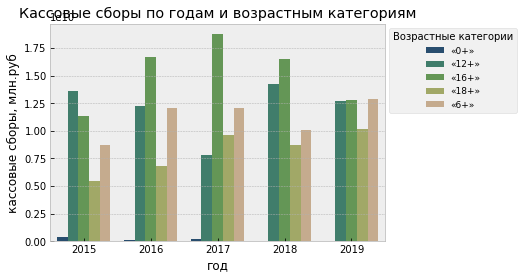

In [96]:
# отобразим на графике кассовые сборы по возрастным категориям для каждого года
box_vs_age = data.query('year_release >= 2015') \
    .groupby(['year_release', 'age_restriction'])['box_office'] \
    .agg('sum').reset_index()
sns.barplot(
    x='year_release', 
    y='box_office', 
    data=box_vs_age, 
    hue='age_restriction',
    palette = 'gist_earth'
)
plt.legend(bbox_to_anchor=(1,1), loc='upper left', title='Возрастные категории', fontsize=9)
plt.title('Кассовые сборы по годам и возрастным категориям')
plt.xlabel('год');
plt.ylabel('кассовые сборы, млн.руб');
plt.show()

***Наглядно мы также видим, что категория 16+ не находится в лидерах постоянно, так было в период с 2016 по 2018 гг.***

In [97]:
data[data['year_release'] >= 2015] \
    .pivot_table(index='age_restriction', values='box_office', aggfunc=['mean', 'median', 'min', 'max']) \
    .reset_index()

,age_restriction,mean,median,min,max
,,box_office,box_office,box_office,box_office
0,«0+»,"8,890,960.72","2,943,318.70",0.00,"206,478,186.00"
1,«12+»,"174,193,812.15","5,065,044.25",0.00,"3,073,568,690.79"
2,«16+»,"94,453,085.27","5,600,007.00",0.00,"2,576,613,776.83"
3,«18+»,"51,464,161.08","6,154,439.17",600.00,"1,890,368,076.47"
4,«6+»,"176,020,854.26","13,736,207.98",200.00,"2,779,686,144.00"


***По среднему и медианному значению кассовых сборов лидирует другая категория 6+, однако в самом конце рейтинга те же самые фильмы для любой зрительской аудитории.***

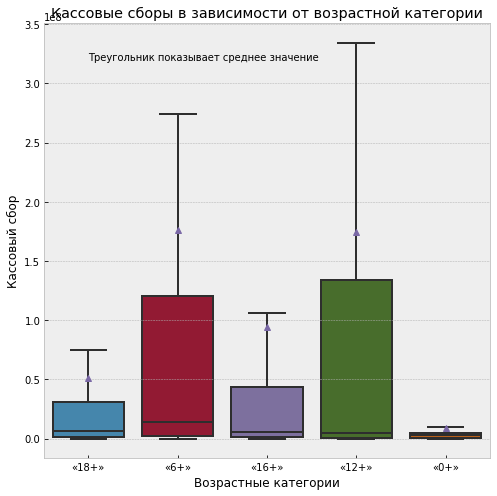

In [100]:
import seaborn as sns
temp = data.copy()
# сохраним маску для среза по годам
year_mask = temp['year_release'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8, 'Треугольник показывает среднее значение')
plt.show()

***Вывод:***

- поизучав данные мы выяснили, что 2019 и 2016 гг. оказались самыми плодотворными по количеству вышедших в прокат фильмов (530 и 526 фильмов соответственно), в среднем в прокат выходило около 316 фильмов в год.
- если считать общее количество снятых фильмов, то более всего фильмов вышло в 2010 году, а также в период 2018-2019 гг., в среднем в год снимают около 748 фильмов.
- информация о прокате указана примерно для половины фильмов в нашей выборке, полнее всего в исследуемых данных представлен период 2015-2019 гг.
- как мы увидели самая максимальная сумма сборов была в 2018 году , а самая минимальная - в первом году из нашей выборки - 2010 году (2 428 654 руб), в принципе сумма сборов достаточно логично увеличивается с течением времени. Значительную долю рынка проката российского кино тем не менее составляют зарубежные картины.
- для анализа в данном случае лучше использовать медианное значение, так как очень большой разбег в данных. Самый хороший для российского рынка кинопроката год был 2017, в среднем фильм приносил около 10 млн.руб. в год, а самый худший - 2010 год.
- наиболее денежная в плане кассовых сборов категория - это молодые люди 16+, менее же всего в прокате собрали картины для любой зрительской аудитории 0+. Зависимости от года выпуска фильма в разбивке по возрастам не прослеживается.

## Исследование фильмов с государственной поддержкой

На этом этапе посмотрим, сколько выделяют средств на поддержку кино и проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

***Создадим отдельный датафрейм только с теми фильмами, которые получали государственную поддержку и проанализируем их полностью.***

In [102]:
# возьмем строки только с теми картинами, которые получили гос поддержку
df = data[data['refundable_support'].isna()==False].copy()
df

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year_release,main_director,main_genre,country,finsupport_share,country_type
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+»,0.00,...,Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,Россия,0.33,отечественный
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+»,0.00,...,Министерство культуры,NaN,NaN,"28,140.00",2014,А.Якимчук,NaN,Россия,0.70,отечественный
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+»,0.00,...,Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,Россия,0.61,отечественный
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+»,0.00,...,Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,Россия,0.69,отечественный
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+»,0.00,...,Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,Россия,0.62,отечественный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7462,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+»,"100,000,000.00",...,Фонд кино,6.00,"история,биография,драма","717,703,185.53",2019,А.Кравчук,история,Россия,0.51,отечественный
7464,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+»,"100,000,000.00",...,Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00",2019,Д.Шмидт,мультфильм,Россия,0.53,отечественный
7472,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+»,"100,000,000.00",...,Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,Россия,0.53,отечественный
7474,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+»,0.00,...,Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,Россия,0.65,отечественный


In [100]:
# на всякий случай посмотрим информацию о получившемся датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7476
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   pu_number              332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

***Из информации по таблице мы увидели, что заполненных ячеек по кассовым сборам меньше по количеству, чем ячеек с данными по господдержке. Как будто некоторые фильмы, которые были спонсированы государством, оказались без сборов совсем. Проверим так ли это или это ошибка, поищем информацию по сборам в открытых источниках.***

In [101]:
# выведем только те строки, в которых не заполнены данные по кассовым сборам
df[df['box_office'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year_release,main_director,main_genre,country,finsupport_share,country_type
2799,Золотая рыбка (2015),111018715,2015-10-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+»,0.00,...,Министерство культуры,6.30,драма,NaN,2015,А.Галибин,драма,Россия,0.60,отечественный
3336,Любовь и Сакс,111001217,2017-02-16 12:00:00+00:00,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+»,0.00,...,Министерство культуры,5.20,мелодрама,NaN,2017,А.Сурикова,мелодрама,Россия,0.16,отечественный
3710,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06 12:00:00+00:00,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+»,0.00,...,Министерство культуры,7.00,"мультфильм,приключения,детектив",NaN,2016,А.Романец,мультфильм,Россия,0.62,отечественный
5660,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+»,0.00,...,Министерство культуры,7.20,"детский,комедия",NaN,2017,Е.Соколов,детский,Россия,0.56,отечественный
6474,Зима,111023518,2019-03-15 12:00:00+00:00,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,"З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П...",«16+»,0.00,...,Министерство культуры,5.20,"драма,криминал",NaN,2019,С.Черников,драма,Россия,0.63,отечественный
6707,Мальчик русский,111002619,2019-02-20 12:00:00+00:00,Художественный,"АО ""Ленфильм""",Россия,А.Золотухин,NaN,«12+»,0.00,...,Министерство культуры,6.10,"драма,военный,история",NaN,2019,А.Золотухин,драма,Россия,0.64,отечественный
6966,Танец с саблями,111008619,2019-05-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",Россия,Ю.Разыков,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",«16+»,0.00,...,Министерство культуры,5.80,"драма,история,биография",NaN,2019,Ю.Разыков,драма,Россия,0.65,отечественный
7007,Куратор,111010019,2019-06-13 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Атлантик"", 20 стэпс продакшнс",Россия - Грузия,П.Левченко,Е.Филиппова,«16+»,0.00,...,Министерство культуры,4.90,"драма,криминал,детектив",NaN,2019,П.Левченко,драма,Россия,0.41,отечественный
7178,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00+00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+»,0.00,...,Министерство культуры,8.00,семейный,NaN,2019,А.Попова,семейный,Россия,0.09,отечественный
7227,На Луне,111015519,2019-11-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+»,0.00,...,Министерство культуры,6.60,"приключения,триллер",NaN,2019,Е.Михалков-Кончаловский,приключения,Россия,0.60,отечественный


***Информацию удалось найти не по всем источникам, по той причине, что некоторые фильмы были сняты для открытых интернет-ресурсов или для ТВ, поэтому для таких картин проставили нулевые значения.***

In [102]:
# произведем необходимые замены
df.loc[6474, 'box_office'] = 1079757
df.loc[6707, 'box_office'] = 1416750
df.loc[6966, 'box_office'] = 2020125
df.loc[7007, 'box_office'] = 218724
df.loc[7227, 'box_office'] = 1281402
df.loc[7342, 'box_office'] = 1375981
df.loc[7472, 'box_office'] = 1529206456
df.loc[7476, 'box_office'] = 790908341
df.loc[[2799, 3336, 3710, 5660, 7178, 7474], 'box_office'] = 0

In [103]:
# проверим еще раз, что пропусков нет
df[df['box_office'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year_release,main_director,main_genre,country,finsupport_share,country_type


***Для анализа добавим столбцы с общей суммой предоставленных средств господдержки и с кассовыми сборами за вычетом объема господдержки.***

In [104]:
# создадим нужные столбцы
df['total_support'] = df['refundable_support'] + df['nonrefundable_support']
df['total_box'] = df['box_office'] - df['budget']

Вспомним описание тех столбцов, которые мы добавляли самостоятельно:
- `year_release` — год премьеры фильма
- `main_director` — главный режиссер фильма
- `main_genre` — основной жанр фильма
- `country` — основная страна фильма
- `finsupport_share` — доля господдержки от общего бюджета фильма
- `total_support` — общая сумма господдержки фильма
- `total_box` — кассовые сборы без учета господдержки фильма

In [105]:
# выведем описательную статистику нового датафрейма
df.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,year_release,finsupport_share,total_support,total_box
count,332.00,332.00,332.00,332.00,316.00,332.00,332.00,332.00,332.00,332.00
mean,"111,593,819.10","11,864,457.83","48,980,988.89","131,422,395.80",6.02,"133,858,485.27","2,016.72",0.54,"60,845,446.72","2,436,089.48"
std,"5,703,031.32","24,916,555.26","59,980,117.92","187,148,242.67",1.15,"339,420,608.88",1.64,0.20,"72,755,459.47","312,937,057.94"
min,"111,000,115.00",0.00,0.00,"6,000,000.00",1.00,0.00,"2,013.00",0.04,"3,000,000.00","-1,971,477,243.41"
25%,"111,004,891.50",0.00,"25,000,000.00","45,524,799.50",5.30,"1,076,730.00","2,015.00",0.38,"25,333,750.00","-69,903,431.50"
50%,"111,010,367.00",0.00,"30,000,000.00","71,196,901.50",6.20,"13,298,430.11","2,017.00",0.61,"35,000,000.00","-41,254,152.52"
75%,"111,017,815.75","15,000,000.00","40,375,000.00","150,000,000.00",6.70,"105,060,267.49","2,018.00",0.66,"60,000,000.00","-3,060,544.07"
max,"214,010,116.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.40,"3,073,568,690.79","2,019.00",1.00,"500,000,000.00","2,913,568,690.79"


***Отрицательные значения в столбце с кассовыми сборами показывают нам, что далеко не все фильмы, которые были спонсированы государством, окупились в итоге после выхода на экран.***

***Посмотрим, как обстоит дело с рейтингами у данных фильмов.***

In [106]:
# выведем значения рейтинга у фильмов с господдержкой с разбивкой по году
df.groupby('year_release')['ratings'].agg(['mean', 'min', 'max']).reset_index()

,year_release,mean,min,max
0,2013,6.70,5.30,8.10
1,2014,6.01,3.80,6.90
2,2015,6.14,2.80,9.40
3,2016,5.68,1.00,8.50
4,2017,6.00,2.90,8.00
5,2018,6.00,2.50,7.70
6,2019,6.18,3.20,8.20


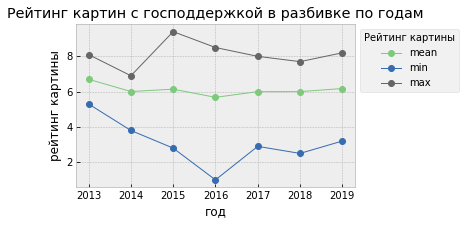

In [107]:
# составим график рейтингов фильмов с господдержкой с разбивкой по году
df.groupby('year_release')['ratings'] \
    .agg(['mean', 'min', 'max']) \
    .plot(style='o-', grid=True, figsize=(5, 3), linewidth= 1, cmap='Accent')
plt.legend(bbox_to_anchor=(1,1), loc='upper left', title='Рейтинг картины')
plt.title('Рейтинг картин с господдержкой в разбивке по годам')
plt.xlabel('год');
plt.ylabel('рейтинг картины');
plt.show()

***Как мы увидели, был достигнут самый минимальный рейтинг в 2016 году (мы еще проверяли, не ошибка ли это (рейтинг 1,0) - нет не ошибка :)), самый же наоборот максимальный рейтинг был достигнут в 2015 году (9.4), невероятно классный результат. Да, фильмы с поддержкой государства когда-то могли достигать и почти максимально возможного рейтинга.***

***В среднем, рейтинг таких картин составляет около 6,0 баллов.***

In [108]:
# посмотрим общую сводную картину по размеру господдержки  и кассовым сборам по годам
df.groupby('year_release')[['total_support', 'total_box']] \
    .agg(['sum','median', 'min', 'max']).reset_index()

year_release    total_support                                             \
                            sum        median           min            max   
0         2013   134,347,945.00 67,173,972.50 26,500,000.00 107,847,945.00   
1         2014   572,002,299.00 27,500,000.00 20,000,000.00  90,000,000.00   
2         2015 3,656,241,459.00 30,000,000.00  4,700,000.00 250,000,000.00   
3         2016 4,303,155,482.00 35,000,000.00  6,000,000.00 450,000,000.00   
4         2017 3,183,971,662.00 40,000,000.00  6,000,000.00 400,000,000.00   
5         2018 3,446,969,465.00 45,000,000.00 15,000,000.00 260,000,000.00   
6         2019 4,904,000,000.00 40,000,000.00  3,000,000.00 500,000,000.00   

          total_box                                                     
                sum          median               min              max  
0   -235,113,004.90 -117,556,502.45   -156,066,458.50   -79,046,546.40  
1   -285,062,616.40  -38,122,768.00   -179,168,850.90   315,942,875.30  
2 -1,953,383,788.86  -39,235,453.00   -427,421,682.60   552,409,725.40  
3 -1,473,234,908.90  -51,689,506.00   -319,915,396.40   788,321,489.00  
4  3,807,902,732.96  -35,328,950.00   -521,130,409.00 2,189,493,953.00  
5  2,933,404,911.25  -37,594,026.25   -354,674,120.85 1,707,969,287.52  
6 -1,985,731,618.37  -45,909,806.00 -1,971,477,243.41 2,913,568,690.79

***Из интересных взаимосвязей мы можем отметить, что объем государственного финансирования фильмов возрастает и к 2019 году достиг максимальной отметки, однако этого нельзя сказать про объем кассовых сборов - значение со знаком плюс было достигнуто только в 2017 и 2018 году. В остальные года фильмы не особо окупались.***

***Максимальная сумма госфинансирования фильма была предоставлена в 2019 году (500 000 000.00 руб.), кстати именно в этот год достигла пика и максимальная сумма кассовых сборов среди всех таких картин (2 913 568 690.79 руб.).***

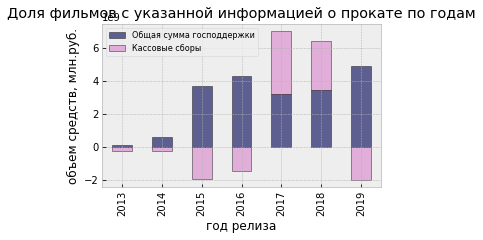

In [109]:
# нарисуем график для сравнения общего размера господдержки в бюджете и кассовых сборов за ее вычетом
df.groupby('year_release')[['total_support', 'total_box']].agg('sum').reset_index() \
    .plot(kind='bar',
          x='year_release',
          stacked= True,
          edgecolor = 'black',
          figsize=(5,3),
          title='Доля фильмов с указанной информацией о прокате по годам',
          xlabel='год релиза',
          ylabel='объем средств, млн.руб.',
          alpha=0.8,
          grid=True,
          cmap='tab20b')
plt.legend(["Общая сумма господдержки", "Кассовые сборы"], fontsize=8)
plt.show()

***Все познается в сравнении. Явно выделяются из общей картины 2017 и 2018 года - финансирование от государства было примерно на том же уровне, что и в 2015 - 2019 годах, но при этом достаточно большая сумма кассовых сборов, и что самое важное, со знаком плюс.***

***Хотя не можем не обратить внимание, что в 2013-2014 гг. данных для анализа маловато.***

In [110]:
# выведем количество спонсированных фильмов в разбивке по годам
df.groupby('year_release')['total_support'].agg(['count']).reset_index()

,year_release,count
0,2013,2
1,2014,16
2,2015,86
3,2016,61
4,2017,41
5,2018,56
6,2019,70


***Действительно, очень мало данных по первым двум годам, представленным у нас в выборке, тем не менее убирать не будем.***

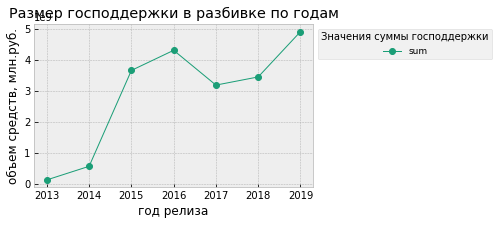

In [111]:
# нарисуем график зависимости значений общей суммы господдержки в разбивке по годам
df.groupby('year_release')['total_support'] \
    .agg(['sum']) \
    .plot(style='-o', grid=True, figsize=(5, 3), linewidth= 1, cmap='Dark2')
plt.legend(bbox_to_anchor=(1,1), title='Значения суммы господдержки', fontsize=9)
plt.title('Размер господдержки в разбивке по годам')
plt.xlabel('год релиза')
plt.ylabel('объем средств, млн.руб.')
plt.show()

***Почти самый высокий размер предоставленной господдержки в 2016 году (не учитывая 2019 год) и достижение самого низкого рейтинга фильма из всех. Не очень удачная закономерность.*** 

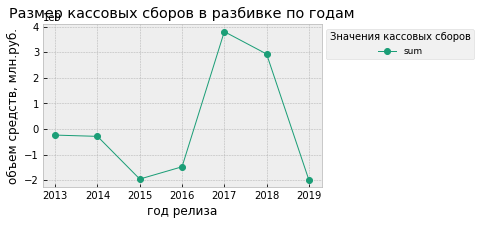

In [112]:
# нарисуем график зависимости значений общей суммы кассовых сборов по годам
df.groupby('year_release')['total_box'] \
    .agg(['sum']) \
    .plot(style='-o', grid=True, figsize=(5, 3), linewidth= 1, cmap='Dark2')
plt.legend(bbox_to_anchor=(1,1), title='Значения кассовых сборов', fontsize=9)
plt.title('Размер кассовых сборов в разбивке по годам')
plt.xlabel('год релиза')
plt.ylabel('объем средств, млн.руб.')
plt.show()

***Посмотрим, в каком году средняя доля государственной поддержки в общем бюджете фильмов была самой большой.***

In [113]:
df.groupby('year_release')['finsupport_share'].agg(['median', 'mean']).reset_index()

,year_release,median,mean
0,2013,0.47,0.47
1,2014,0.58,0.55
2,2015,0.62,0.56
3,2016,0.64,0.57
4,2017,0.52,0.51
5,2018,0.59,0.54
6,2019,0.59,0.51


***И опять же это было в 2016 году - данные подтверждаются и средним, и медианным значением.***

***Посмотрим, какого типа фильмы поддерживаются государством больше всего.***

In [114]:
df['type'].value_counts()

Художественный    300
Анимационный       31
Документальный      1
Name: type, dtype: int64

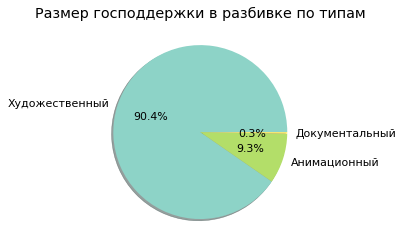

In [103]:
# отобразим на диаграмме размер господдержки по типу фильма
df['type'].value_counts().plot(kind='pie',
                               shadow=True,
                               label='',
                               autopct='%1.1f%%',
                               figsize=(4, 4),
                               title='Размер господдержки в разбивке по типам',
                               cmap='Set3',
                               fontsize=11)
plt.show()

***Как мы увидели, более всего поддерживаются государством художественные фильмы, вероятно есть мнение, что они наиболее популярны в народе, а значит по логике должны лучше окупаться.***

***Теперь посмотрим на возрастные категории, на которые более всего возлагает надежды и финансы государство.***

In [116]:
df['age_restriction'].value_counts()

«16+»    125
«12+»    106
«6+»      65
«18+»     28
«0+»       8
Name: age_restriction, dtype: int64

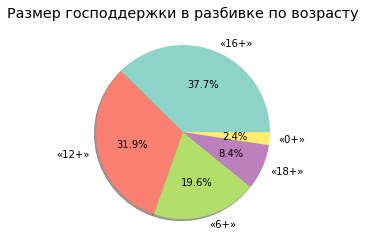

In [117]:
# отобразим наглядно на диаграмме
df['age_restriction'].value_counts().plot(kind='pie',
                                         shadow=True,
                                         label='',
                                         autopct='%1.1f%%',
                                         figsize=(4,4),
                                         title='Размер господдержки в разбивке по возрасту',
                                         cmap='Set3',
                                         fontsize=10)
plt.show()

***Как мы увидели, самая наиболее финансируемая категория - это молодые люди 16+, предполагается скорее всего, что они чаще всего ходят в кино. Недалеко ушли и категории 12+ и 6+ - здесь вероятно есть надежда, что дети "потащат" в кино родителей.***

***Еще интересно посмотреть, какой жанр кино наиболее полно финансируется государством, выведем топ 10 жанров.***

In [118]:
# сгруппируем объем господдержки в разбивке по жанру фильма
top10_genres = df.groupby('main_genre')['total_support'] \
    .agg(['sum']).sort_values(by='sum', ascending=False).reset_index().head(10)
top10_genres

,main_genre,sum
0,драма,"5,314,406,632.00"
1,комедия,"3,218,282,945.00"
2,мультфильм,"2,461,520,000.00"
3,фантастика,"1,406,000,000.00"
4,фэнтези,"1,032,900,000.00"
5,история,"1,020,000,000.00"
6,триллер,"769,645,285.00"
7,приключения,"696,000,000.00"
8,детектив,"485,000,000.00"
9,спорт,"455,000,000.00"


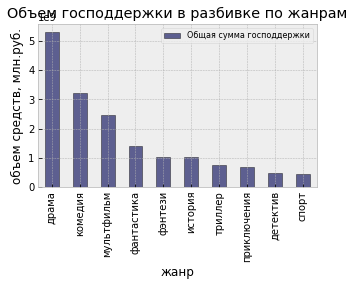

In [119]:
top10_genres.plot(kind='bar',
          x='main_genre',
          edgecolor = 'black',
          figsize=(5,3),
          title='Объем господдержки в разбивке по жанрам',
          xlabel='жанр',
          ylabel='объем средств, млн.руб.',
          alpha=0.8,
          grid=True,
          cmap='tab20b')
plt.legend(['Общая сумма господдержки'], fontsize=8)
plt.show()

In [120]:
# посмотрим еще сразу самый непопулярный жанр
df.groupby('main_genre')['total_support'].agg(['sum']).sort_values(by='sum', ascending=False).reset_index().tail()

,main_genre,sum
15,криминал,"280,000,000.00"
16,мюзикл,"240,453,119.00"
17,детский,"119,000,000.00"
18,биография,"112,510,000.00"
19,реальное ТВ,"53,000,000.00"


***Больше всего государство вкладывается в драмы (5 314 406 632.00 руб. всего) и чуть меньше в комедии (3 218 282 945.00 руб. за все изучаемое время; все верно! - жизнь и так серьезная штука), самый непопулярный жанр оказался реальное ТВ (53 000 000.00
руб.; тут скорее всего данный жанр просел и по кассовым сборам, мы ранее наблюдали в таблице нулевые значения).***

***Еще можно проследить, в каких режиссеров вкладывали больше всего государственных средств, и окупили ли они вложенные средства в итоге.***

In [121]:
# посмотрим сразу, кто у нас представлен в выборке
df['main_director'].unique()

array(['А.Атанесян', 'А.Якимчук', 'Р.Давлетьяров',
       'Е.Миндадзе (псевдоним Катя Шагалова)', 'М.Угаров', 'С.Серегин',
       'В.Глаголева', 'А.Войтинский', 'Д.Федоров', 'Максим Свешников',
       'Т.Аленикова', 'А.Пиманов', 'А.Цицилин', 'А.Стриженов', 'А.Зайцев',
       'Р.Прыгунов', 'С.Попов', 'Д.Месхиев', 'В.Щегольков', 'А.Прошкин',
       'П.Санаев', 'С.Мокрицкий', 'А.Мельник', 'А.Аксененко', 'Ю.Кара',
       'К.Сухарьков', 'В.Демент', 'Ф.Абрютин', 'М.Бальчюнас',
       'Э.Архангельская', 'К.Шипенко', 'Д.Елеонский', 'А.Звягинцев',
       'Е.Татаров', 'А.Федорченко', 'Ю.Фетинг', 'В.Харченко', 'И.Чижиков',
       'А.Меликян', 'А.Андрианов', 'Э.Манжеева', 'А.Калинкин',
       'Е.Константинова (псевдоним Алена Званцева)', 'Н.Джорджадзе',
       'Ф.Дмитриев', 'Р.Каримов', 'Д.Штурманова', 'А.Аравин',
       'С.Говорухин', 'К.Ангелина', 'А.Карпиловский', 'Стефано Лоренци',
       'В.Хотиненко', 'В.Штерянов при участии Е.Немых', 'С.Комаров',
       'И.Северов', 'А.Ананикян', 'К.Белевич

***На этапе предобработки данных это было незаметно, поскольку в этом столбце было более 2 000 значений, сейчас случайно обнаружилась неточность в одной фамилии, лишний пробел, поправим, раз заметили.***

In [122]:
# произведем замену выявленной неточности
data['main_director'] = (
    data['main_director']
    .replace(' Ф.Бондарчук', 'Ф.Бондарчук', regex = True)
)

In [123]:
# сгруппируем режиссеров, вложенные в них средства, сборы и рейтинги
df.groupby('main_director')[['total_support','total_box','ratings']] \
    .agg('sum').sort_values(by='total_support', ascending=False).reset_index().head(10)

,main_director,total_support,total_box,ratings
0,Н.Хомерики,"660,000,000.00","-325,561,715.77",18.10
1,Ф.Бондарчук,"500,000,000.00","585,206,456.00",5.70
2,А.Кравчук,"500,000,000.00","-262,296,814.47",6.00
3,Р.Давлетьяров,"459,847,945.00","-471,167,304.56",33.90
4,А.Мизгирев,"450,000,000.00","-319,915,396.40",6.60
5,Н.Лебедев,"442,104,482.00","766,971,523.00",7.60
6,А.Мегердичев,"400,000,000.00","2,189,493,953.00",7.50
7,Д.Дьяченко,"351,000,000.00","1,624,203,322.12",22.60
8,А.Цицилин,"350,000,000.00","-321,836,566.75",19.00
9,И.Шурховецкий,"350,000,000.00","90,392,336.00",6.40


***Итак, больше всего вложено было в картины режиссера Николая Хомерики (660 000 000.00 руб.), однако ожидания он не оправдал, поскольку не только не окупил средства, но и ушел в минус (-325 561 715.77 руб.) Также очень большую государственную поддержку получил Федор Бондарчук (500 000 000.00 руб.), и здесь кстати достаточно неплохо окупился (585 206 456.00 руб. со знаком плюс).***

***Среди хорошо показавших себя режиссеров также нельзя не отметить двух рекордсменов по кассовым сборам - Антона Мегердичева (2 189 493 953.00	руб.) и Дмитрия Дьяченко (1 624 203 322.12 руб.) - кстати режиссер очень популярного фильма "О чем говорят мужчины".***

In [124]:
df.groupby('main_director')[['total_support','total_box','ratings']] \
    .agg('max').sort_values(by='total_box', ascending=False).reset_index().head(10)

,main_director,total_support,total_box,ratings
0,К.Шипенко,"225,000,000.00","2,913,568,690.79",7.40
1,А.Мегердичев,"400,000,000.00","2,189,493,953.00",7.50
2,А.Сидоров,"180,000,000.00","1,707,969,287.52",6.50
3,Д.Дьяченко,"120,000,000.00","1,302,560,113.00",6.80
4,О.Трофим,"85,000,000.00","1,297,146,575.89",NaN
5,Ф.Бондарчук,"250,000,000.00","788,321,489.00",5.60
6,Н.Лебедев,"442,104,482.00","766,971,523.00",7.60
7,Д.Киселев,"250,000,000.00","681,069,130.00",7.50
8,М.Бальчюнас (псевдоним М.Вайсберг),"100,000,000.00","640,760,839.00",4.50
9,Ф.Бондарчук,"500,000,000.00","585,206,456.00",5.70


***По данной группировке виден еще один лидер по кассовым сборам - Клим Шипенко (2 913 568 690.79 руб.), кстати у него достаточно неплохой рейтинг - 7,4.***

***Что касается других лидеров таблицы - рейтинг фильмов Ф. Бондарчука оказался ниже среднего - 5,6, а вот остальные не так сильно подвели - А.Мегердичев-7,5 и Д.Дьяченко-6,8.***

***Осталось еще посмотреть, есть ли прямая зависимость между суммой государственной поддержки, бюджетом фильма и кассовыми сборами.***

In [125]:
# посмотрим корреляцию между интересующими нас величинами
params = ['total_support',
    'budget',
    'total_box',
    'ratings']     
df[params].corr().style.background_gradient(cmap='Pastel2')

,total_support,budget,total_box,ratings
total_support,1.000000,0.736250,0.132286,0.102222
budget,0.736250,1.000000,-0.151520,0.088855
total_box,0.132286,-0.151520,1.000000,0.078717
ratings,0.102222,0.088855,0.078717,1.000000


***Здесь все логично - очевидная зависимость бюджета фильма и объема господдержки(0.736250). А вот на кассовые сборы (0.132286) и тем более рейтинг (0.102222) господдержка не особо влияет.***

***Вывод:***

- в ходе аналитики мы проследили, что далеко не все фильмы, которые были спонсированы государством, окупились в итоге после выхода на экран.
- разбег рейтинга картин, получивших государственную поддержку необычайно велик (от 1,0 до 9,4), средний рейтинг таких картин составляет около 6,0 баллов.
- объем государственного финансирования фильмов возрастает из года в год и к 2019 году достиг максимальной отметки, однако этого нельзя сказать про объем кассовых сборов - значение со знаком плюс было достигнуто только в 2017 и 2018 году. Была выявлена не самая удачная закономерность - почти самый высокий размер предоставленной господдержки в 2016 году и достижение самого низкого рейтинга фильма из всех в том же году.
- самые популярные у государства типы фильмов - художественные, более всего денег потрачено на фильмы категории 16+, лидеры рейтинга среди жанров кино - это драма и комедия.
- мы посмотрели лидеров топ-чарта среди режиссеров по объему вложенных в их фильмы средств - это К. Шипенко, Н. Хомерики и Ф. Бондарчук, однако не все из них оправдали ожидания, наиболее окупившиеся и достигшие хорошего рейтинга режиссеры - это А.Мегердичев и Д.Дьяченко.
- также мы подтвердили тот факт, что размер государственной поддержки напрямую влияет на бюджет фильма, чего не скажешь о сборах и рейтинге.

## Общий вывод

### Выводы для выявления трендов российского кинопроката и направлений господдержки

Мы проанализировали рынок российского кинопроката за период с 2010 по 2019 гг, в итоге выявили следующие факты и закономерности:
1. Вложенные государством в отечественные фильмы средства очень редко окупаются, однако периодически некоторые профинансированные фильмы становятся настоящими лидерами проката (о чем говорит тот факт, что **рейтинг некоторых картин достигал отметки в 9,4 балла**), что компенсирует потраченные средства.
2. Наиболее часто финансируются художественные фильмы для возрастной категории 16+ (возможно идет расчет на то, что данная категория чаще всего посещает кинотеатры), а также немало денежных средств вкладывается в фильмы 12+ и 6+ (вероятно за счет количества людей, которые могут посетить кинотеатр - дети такого возраста редко ходят в кино в одиночку, обычно с родителями), наиболее популярные жанры - это драмы и комедии.
3. **Лидеры среди режиссеров**, картины которых принесли больше всего прибыли за исследуемый период - это **К. Шипенко, Ф. Бондарчук, А.Мегердичев и Д.Дьяченко**, картины практически каждого из них достигают рейтинга выше среднего - **около 6,0-7,0 баллов**.
4.  Судя по данным, очень хороший вариант, который можно рассматривать для финансирования - это **художественные фильмы**, которые принадлежат к жанрам **драма и комедия для возрастных категорий 16+, 12+ и 6+.**

### Выводы в ходе исследовательского анализа данных

1. В процессе исследования данных нам потребовалось некоторые данные преобразовать в другой тип, например, в тип datetime мы преобразовали столбец с датами.
2. В столбцах обнаружились пропуски в данных - некоторые пропуски мы заполнили информацией из открытых источников, остальные оставляли как есть, особенно те, которые нам не требовались для анализа. Также много пропусков встретилось в столбцах с информацией о государственной поддержке, однако они логичны, для данных картин она не была предоставлена.
3. Мы изучили столбцы с категориальными данными, обнаружили, что есть некоторые неточности, как в написании определенных категорий, так и в лишних пробелах, также очень многие данные указаны по несколько значений в одной ячейке, что тоже затрудняло анализ. Решили проблему выделением первого значения в отдельные столбцы.
4. Мы изучили количественные данные, выявили некоторые пропуски, скорее всего случайные (так как бюджет картины не может быть меньше суммы предоставленной господдержки), заполнили суммой выделенных государством средств. Для более наглядного анализа также добавили столбец с долей государственной поддержки.
5. В процессе разведовательного анализа мы использовали различные типы графиков и диаграмм (круговая, гистограмма, столбчатая, матрица корреляции, диаграмма размаха) в зависимости от задачи, которая перед нами стояла и выяснили, что в некоторых случаях нагляднее было применить круговую диаграмму (как в случае с  данными из столбцов с возрастными категориями или типами фильмов), а в других случаях мы быстрее поймем, что прямая зависимость есть, например, на матрице корреляции (нагляднее всего проследили зависимость бюджета картины от объема государственного финансирования).